In [2]:
%pylab inline
rcParams['savefig.dpi']=100

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy import  stats

In [4]:
chisq=stats.chi2(1)

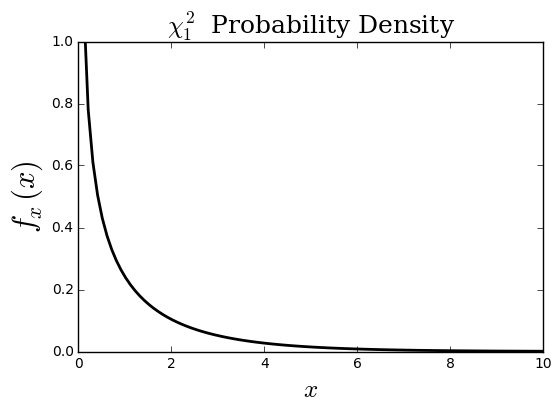

In [5]:
fig,ax=subplots()
xi = np.linspace(0.01,10,100)
ax.plot(xi,chisq.pdf(xi),color='k',lw=2)
ax.axis(ymax=1)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$f_x(x)$',fontsize=22)
ax.set_title(r'$\chi_1^2$ Probability Density',fontsize=18,fontdict={'family':'serif'})
fig.savefig('../fig-probability/ProbabilityInequalities_001.png')

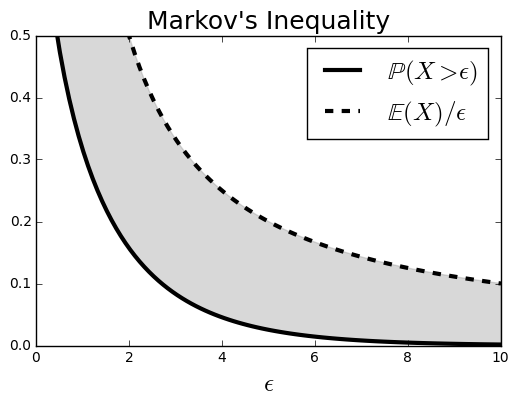

In [6]:
fig,ax=subplots()
ax.plot(xi,1-chisq.cdf(xi),label=r'$\mathbb{P}(X>\epsilon)$',color='k',linestyle='-',lw=3)
ax.plot(xi,1/xi,label=r'$\mathbb{E}(X)/\epsilon$',lw=3,color='k',ls='--')
ax.fill_between(xi,1-chisq.cdf(xi),1/xi,color='gray',alpha=.3)
ax.axis(ymax=.5)
ax.set_xlabel('$\epsilon$',fontsize=18)
ax.legend(fontsize=18)
ax.set_title("Markov's Inequality",fontsize=18)
fig.savefig('../fig-probability/ProbabilityInequalities_002.png')

In [7]:
chisq.mean()

1.0

In [8]:
from scipy.integrate import quad
rv = stats.chi2(1)

In [9]:
# from sympy import init_printing;init_printing()

In [10]:
import sympy
from sympy import stats as ss
t = sympy.symbols('t',real=True,positive=True)
# z = sympy.symbols('z',real=True,positive=True)

x=ss.ChiSquared('x',1)

In [11]:
# v=ss.P((x-1) > t,x>1)+ss.P(-(x-1) > t,x<1)

In [12]:
w=(1-ss.cdf(x)(t+1))+ ss.cdf(x)(1-t)

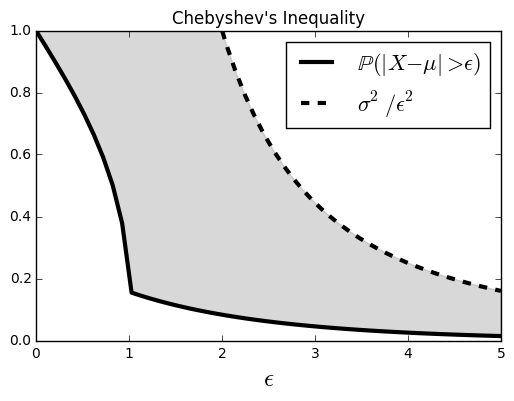

In [13]:
fig,ax=subplots()
fw=sympy.lambdify(t,w)
ti = np.linspace(.01,5)
fvals = map(fw,ti)
ax.plot(ti,fvals,'k',lw=3,label=r'$\mathbb{P}(\vert X-\mu\vert > \epsilon)$')
ax.plot(ti,4/ti**2,'k--',lw=3,label=r'$\sigma^2/\epsilon^2$')
ax.fill_between(ti,fvals,4/ti**2,color='gray',alpha=.3)
ax.axis(ymax=1)
ax.set_xlabel('$\epsilon$',fontsize=18)
ax.set_title("Chebyshev's Inequality")
ax.legend(fontsize=16)
fig.savefig('../fig-probability/ProbabilityInequalities_003.png',dpi=100)

In [14]:
%qtconsole

In [15]:
# from sympy.interactive import printing
# printing.init_printing(use_latex=True)

In [16]:
from IPython.display import Math
Math(sympy.latex(w))

<IPython.core.display.Math object>

In [17]:
Math(sympy.latex(ss.cdf(x)(t)))

<IPython.core.display.Math object>

## Hoeffding’s Inequality

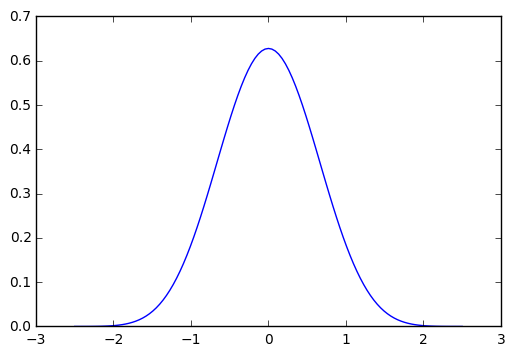

In [18]:
from  scipy.integrate import quad
from scipy.interpolate import  interp1d

def pdf(n=3,m=20):
    u = np.ones(m)
    fv=reduce(lambda i,j:np.convolve(i,j),[u,]*n,u)
    xv = np.linspace(0,n,len(fv))
    norm = (xv[1]-xv[0])*sum(fv)
    xv = xv-np.mean(xv)
    return interp1d(xv,fv/norm,fill_value=0,bounds_error=False)

f3=pdf(5)
apdf=interp1d(f3.x[f3.x>=0],f3.y[f3.x>=0]*2,fill_value=0,bounds_error=False)

ti = linspace(0.01,f3.x.max(),50)

plot(f3.x,f3.y,'-')

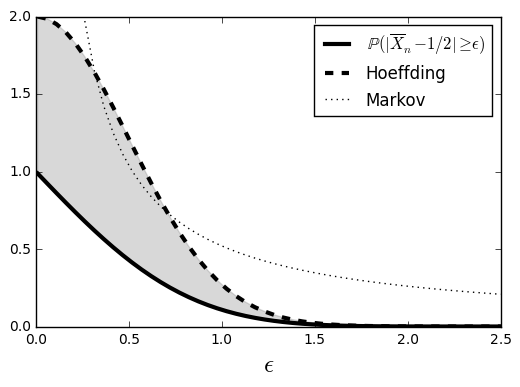

In [24]:
fig,ax=subplots()

vals = map(lambda t:quad(apdf,t,100)[0],ti)
ax.plot(ti,vals,'-k',label=r'$\mathbb{P}(\vert \overline{X}_n-1/2\vert \geq \epsilon)$',lw=3)
ax.plot(ti,2*np.exp(-2*ti**2),label='Hoeffding',color='k',ls='--',lw=3)
ax.fill_between(ti,vals,2*np.exp(-2*ti**2),color='gray',alpha=0.3)
ax.plot(ti,0.52/ti,label='Markov',color='k',ls=':')
ax.legend(loc=0,fontsize=12)
ax.axis(ymax=2)
ax.set_xlabel('$\epsilon$',fontsize=18)
fig.savefig('../fig-probability/ProbabilityInequalities_004.png',dpi=100)